In [1]:
import os
import glob as glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from tqdm import tqdm



In [2]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from torchvision.utils import make_grid


In [3]:
from model.DC_WGAN_GP import Generator, Critic
from processing.preprocessing import denorm, show_images

In [4]:
print(os.getcwd())
os.chdir('..')
os.getcwd()


/home/anhnguyen/Documents/GAN/src


'/home/anhnguyen/Documents/GAN'

In [5]:
DATA_DIR = glob.glob(f'animeFaces64')[0]
DATA_DIR

'animeFaces64'

In [6]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
print(device)

cuda


# Load models

In [7]:
#Moving model to device
critic = Critic(im_chan = 3)
critic.to(device)

latent_size = 128

generator = Generator(z_dim = latent_size, im_chan = 3)
generator.to(device)

Generator(
  (gen): Sequential(
    (0): Sequential(
      (0): ConvTranspose2d(128, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (2): Sequential(
      (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (3): Sequential(
      (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [8]:
generator.load_state_dict(torch.load('WGAN_weights_64/G_64_E24.pth'))
generator.eval()

Generator(
  (gen): Sequential(
    (0): Sequential(
      (0): ConvTranspose2d(128, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (2): Sequential(
      (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (3): Sequential(
      (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

# Generate Images

torch.Size([64, 3, 64, 64])


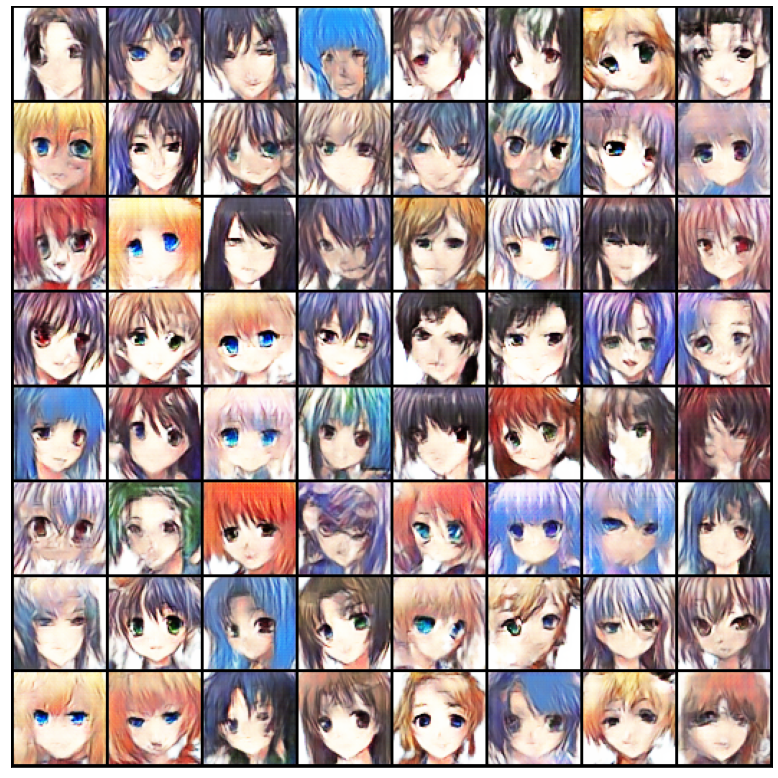

In [10]:
batch_size = 64
xb = torch.randn(batch_size, latent_size, 1, 1).to(device) # random latent tensors
fake_images = generator(xb).cpu()
print(fake_images.shape)
show_images(fake_images)

In [14]:
save_dir = 'anime64gen_samples'
if not os.path.exists(save_dir):
    os.mkdir(save_dir)

for i in range(16):
    xb = torch.randn(batch_size, latent_size, 1, 1).to(device) # random latent tensors
    fake_images = generator(xb).cpu()
    for j in range(batch_size):
        img = transforms.functional.to_pil_image(fake_images[j, :,:,:])
        img.save(save_dir + '/00'+ str(i) + str(j) + '.png') 

In [17]:
from PIL import Image

real_save_dir = 'WaifuGen_realsample'
if not os.path.exists(real_save_dir):
    os.mkdir(real_save_dir)

anime_gen =  glob.glob(f'anime64gen_samples/*')
print(len(anime_gen))

for i, _ in enumerate(anime_gen[:501]):
    img = Image.open(anime_gen[i])

    background = Image.new('RGB', (128, 128))

    background.paste(img, (0, 0))#, img)
    background.save(real_save_dir + '/' + os.path.basename(anime_gen[i]),"PNG")

974


In [23]:
import json
with open('anime-face-detector/Waifu_gen_detection.json') as f:
    data = json.load(f)

score = []
for key in data.keys():
    try:
        score.append(data[key][0]['score'])
    except:
        score.append(0)
        
print(np.mean(score))

0.17376744318865017
